In [1]:
import coffea.hist as hist

In [2]:
histo = hist.Hist("Counts",
                  hist.Cat("sample", "sample name"),
                  hist.Bin("x", "x value", 20, -10, 10),
                 )

In [3]:
import numpy as np

In [4]:
x = np.random.normal(size=1000)

In [5]:
histo.fill(sample='dataset',x=x)

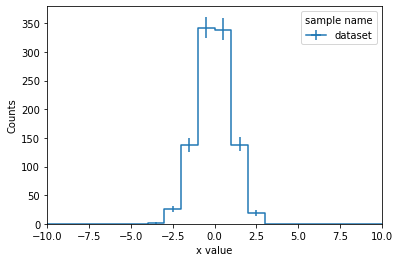

In [6]:
h1 = hist.plot1d(histo)

In [89]:
class Hist_to_array():
    def __init__(self,hist,name):
        
        self.hist = hist
        self.name = name
        

        
    def bin_content(self):
        
        c = self.hist.values()
        key = list(c.keys())[0]
        
        self.length = len(self.hist.identifiers(self.name))
        self.content = c[key]
        self.bin = np.array([self.hist.identifiers(self.name)[i].mid for i in range(self.length)]) 
            
        return self.length, self.bin, self.content
    
    
    def Extract_data(self):
        exr_arr = np.array([])
        
        _,bin_,content_ = self.bin_content()
        for x,y in zip(bin_,content_):
            if y ==0: continue;
        
            sub_arr = np.ones(int(y)) * x
            exr_arr = np.append(exr_arr,sub_arr)
        return exr_arr

In [90]:
length,bins,contents = Hist_to_array(histo,'x').bin_content()

In [91]:
arr =Hist_to_array(histo,'x').Extract_data()

<BarContainer object of 20 artists>

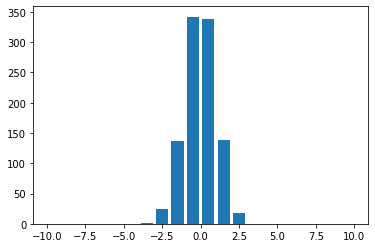

In [92]:
plt.bar(bins,contents)

(array([  1.,  25.,   0., 137.,   0., 342., 339.,   0., 138.,  18.]),
 array([-3.5, -2.9, -2.3, -1.7, -1.1, -0.5,  0.1,  0.7,  1.3,  1.9,  2.5]),
 <BarContainer object of 10 artists>)

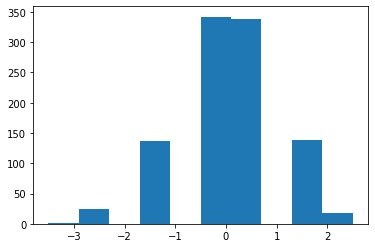

In [93]:
plt.hist(arr)